# Solving Poisson's Equation

Example is wire a high potential in box with walls at ground.

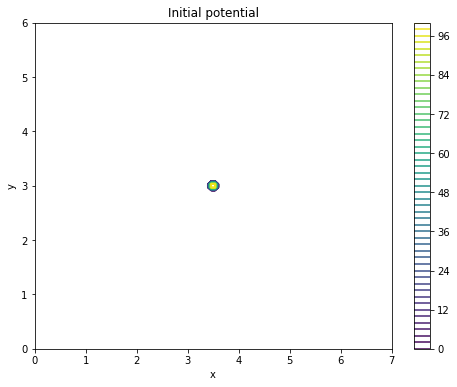

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
nX = 100
nY = 100
phi = np.zeros((nX, nY))
xMin = 0.0
xMax =7.0
xStep  = (xMax - xMin)/nX
yMin = 0.0
yMax = 6.0
yStep = (yMax - yMin)/nY
xGrid, yGrid = np.meshgrid(np.linspace(xMin, xMax, nX), np.linspace(yMin, yMax, nY))
#
# Fix some values of phi (boundary conditions) 
phiBot = 0.0
phiTop = 100.0
phi[:, 0] = phiBot
phi[:, nY - 1] = phiBot
phi[nX//2, nY//2] = phiTop
phi[nX//2, nY//2 - 1] = phiTop
phi[nX//2 - 1, nY//2] = phiTop
phi[nX//2 - 1, nY//2 - 1] = phiTop
#
plt.figure(figsize = (8, 6))
levels = np.linspace(phiBot, phiTop, 51)
CS = plt.contour(xGrid, yGrid, phi, levels, origin='lower')
plt.title('Initial potential')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(CS)
plt.savefig("RelaxationStart.png")
plt.show()

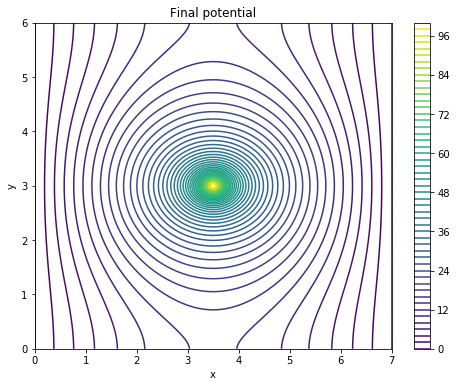

In [8]:
#
# Relaxing arrays, one for x, one for y
phiNS = np.zeros((nX, nY))
phiEW = np.zeros((nX, nY))
nIter = 4000
for n in range(0, nIter):
    #
    # Update x with periodic boundary conditions 
    phiEW[1:nX - 1, :] = (phi[2:, :] + phi[:-2, :])/xStep**2
    phiEW[0, :] = (phi[1, :] + phi[-1, :])/xStep**2
    phiEW[nX - 1, :] = (phi[0, :] + phi[nX - 2, :])/xStep**2
    #
    # Update y with fixed boundary conditions 
    phiNS[:, 1:nY - 1] = (phi[:, 2:] + phi[:, :-2])/yStep**2
    phiNS[:, 0] = phiBot
    phiNS[:, nY - 1] = phiBot
    #
    # Complete update in both x and y
    phi = (phiEW + phiNS)*xStep**2*yStep**2/(2*(xStep**2 + yStep**2))
    #
    # Set remaining boundary conditions
    phi[nX//2, nY//2] = phiTop
    phi[nX//2, nY//2 - 1] = phiTop
    phi[nX//2 - 1, nY//2] = phiTop
    phi[nX//2 - 1, nY//2 - 1] = phiTop
#
plt.figure(figsize = (8, 6))
CS = plt.contour(xGrid, yGrid, phi, levels, origin='lower')
plt.title('Final potential')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(CS)
plt.savefig("RelaxationEnd.png")
plt.show()